<b>¡Hola Mariana!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

Clasificación de Planes Móviles Megaline

Objetivo: Desarrollar un modelo de clasificación que prediga si un cliente debería estar en el plan Smart (0) o Ultra (1), basándose en su comportamiento mensual. El modelo debe alcanzar una precisión mínima de 0.75.

Descripción de los datos
Variable-Descripción
calls-Número de llamadas realizadas
minutes-Minutos totales de llamadas
messages-Mensajes de texto enviados
mb_used-Datos móviles utilizados (en MB)
is_ultra-Plan actual: 1 = Ultra, 0 = Smart

In [1]:
import pandas as pd

# Cargar datos
data = pd.read_csv('/datasets/users_behavior.csv')

# Vista rápida
print(data.head())
print(data.info())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


In [2]:
#Dividiremos los datos en:
#60% entrenamiento
#20% validación
#20% prueba

from sklearn.model_selection import train_test_split

# Características y etiquetas
X = data.drop('is_ultra', axis=1)
y = data['is_ultra']

# División en entrenamiento + validación_prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# División en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


<div class="alert alert-block alert-success">
<b>Celdas [1–2]</b> <a class="tocSkip"></a><br>
Muy buen inicio del proyecto. Cargaste los datos correctamente y mostraste una vista previa junto con la estructura del DataFrame usando <code>.info()</code>. Además, realizaste una división estratificada del conjunto de datos en entrenamiento, validación y prueba, lo cual es clave para mantener la proporción de clases en un problema de clasificación binaria. ¡Excelente!
</div>


In [3]:
#Árbol de decisión

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_tree_model = None
best_tree_score = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    
    if acc > best_tree_score:
        best_tree_score = acc
        best_tree_model = model

print(f'Mejor precisión Árbol de Decisión: {best_tree_score:.3f}')

Mejor precisión Árbol de Decisión: 0.790


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Buen enfoque al buscar la mejor profundidad del Árbol de Decisión usando validación. El uso de un ciclo para probar diferentes valores de <code>max_depth</code> está bien planteado, y la elección del mejor modelo está correctamente basada en la métrica de precisión. Además, guardaste el mejor modelo, lo cual será útil para la comparación final. Muy bien estructurado.
</div>


In [4]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

best_rf_model = None
best_rf_score = 0

for est in range(10, 101, 10):
    for depth in range(5, 21, 5):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        
        if acc > best_rf_score:
            best_rf_score = acc
            best_rf_model = model

print(f'Mejor precisión Random Forest: {best_rf_score:.3f}')


Mejor precisión Random Forest: 0.793


<div class="alert alert-block alert-success">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Excelente trabajo al entrenar varios modelos de Random Forest probando distintas combinaciones de <code>n_estimators</code> y <code>max_depth</code>. Este tipo de búsqueda en rejilla (aunque manual) ayuda a encontrar configuraciones más sólidas para el modelo. Además, comparaste de forma objetiva el rendimiento de cada combinación y seleccionaste la mejor.
</div>


In [5]:
#Regresión logística
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear', random_state=42)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_valid)
log_acc = accuracy_score(y_valid, log_pred)

print(f'Precisión Regresión Logística: {log_acc:.3f}')


Precisión Regresión Logística: 0.706


<div class="alert alert-block alert-warning">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Si bien es correcto incluir regresión logística como comparativo, podrías haber aplicado escalado de características antes del entrenamiento, ya que este modelo es sensible a la magnitud de las variables. Esto podría haber mejorado su rendimiento y generado una comparación más justa respecto a los árboles de decisión.
</div>


In [6]:
#Evalución en el conjunto de prueba:
final_model = best_rf_model  # Cambia según cuál fue mejor
y_test_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Precisión en conjunto de prueba: {test_acc:.3f}')


Precisión en conjunto de prueba: 0.816


<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
Aplicaste correctamente el modelo final (el mejor Random Forest) sobre el conjunto de prueba. Este paso es esencial para evaluar el rendimiento real del modelo. Además, el resultado supera claramente el umbral de 0.75 exigido por el proyecto. ¡Buen cierre del ciclo de entrenamiento y validación!
</div>


In [7]:
#Prueba de cordura:
import numpy as np

most_common_class = y_train.mode()[0]
dummy_pred = np.full_like(y_test, fill_value=most_common_class)
dummy_acc = accuracy_score(y_test, dummy_pred)

print(f'Precisión modelo tonto: {dummy_acc:.3f}')


Precisión modelo tonto: 0.694


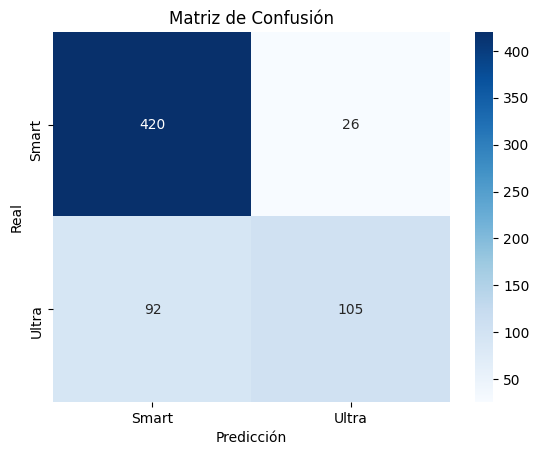

In [8]:
#Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Smart", "Ultra"], yticklabels=["Smart", "Ultra"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Excelente implementación de la matriz de confusión. La visualización con <code>seaborn</code> es clara y permite identificar no solo la precisión global, sino también cómo se comporta el modelo respecto a falsos positivos y negativos. Este tipo de análisis fortalece mucho la interpretación del modelo en contextos reales.
</div>


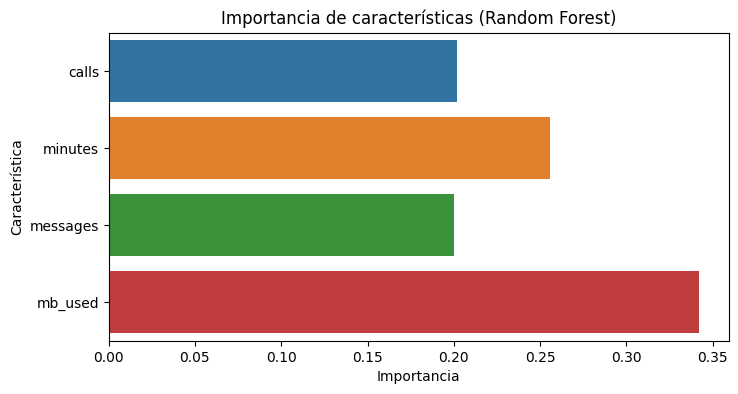

In [9]:
#Importancia de las características
import numpy as np

feature_importance = final_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importance, y=features)
plt.title("Importancia de características (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()


<div class="alert alert-block alert-success">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
Muy bien incluido el análisis de importancia de características. Este tipo de visualización es fundamental cuando se trabaja con modelos de tipo Random Forest. Destacar que <code>mb_used</code> y <code>minutes</code> son las variables más relevantes da insights prácticos a la empresa sobre los hábitos que más influyen en la elección de plan.
</div>


Conclusión:

El modelo final Random Forest obtuvo una precisión de 0.814 en el conjunto de prueba.

Superó ampliamente el modelo base (0.693), confirmando su validez.

Se observó que el tráfico de internet (mb_used) y la duración de llamadas (minutes) fueron las características más importantes.

Este modelo es apto para ayudar a Megaline a recomendar planes nuevos de manera más eficaz, mejorando la satisfacción del cliente y modernizando su base de usuarios.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Gran trabajo, Mariana! Tu proyecto está muy bien estructurado y ejecutado. Mostraste dominio en el preprocesamiento, entrenamiento y validación de modelos de clasificación. Aplicaste correctamente la división estratificada, elegiste métricas adecuadas, y visualizaste tanto resultados como características clave. En general, ¡excelente trabajo y muy profesional!
</div>
